## 케라스 모델을 만드는 방법

In [1]:
# Sequential 클래스
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

In [2]:
# 점진적으로 Sequenential 모델 만들기
model = keras.Sequential()
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

# 가중치를 만들기위해 모델을 호출

In [3]:
import numpy as np
model.build(input_shape=(None,3))

In [4]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 10) dtype=float32, numpy=
 array([[-0.6304964 ,  0.00203228, -0.6458516 ,  0.5394832 , -0.03149605,
         -0.4861958 ,  0.28285939, -0.3528561 ,  0.44857788, -0.15648746],
        [ 0.5872041 ,  0.1290505 ,  0.28739887, -0.36054286,  0.36958957,
          0.572719  ,  0.54796183, -0.18328828, -0.52452767,  0.5023954 ],
        [-0.47542843,  0.4510182 , -0.5317421 ,  0.05433905,  0.22061348,
         -0.19665012, -0.41377208, -0.22408682,  0.16001737, -0.3424467 ]],
       dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[-0.19966176,  0.12154096, -0.26169774,  0.0903939 , -0.40542233,
         -0.00563133,  0.08930963, -0.37215653, -0.3100154 , -0.4326961 ],
        [ 0.32109976,  0.53427994, -0.30453414,  0.18000722,  0.329341  ,
         -0.3773504 , -0.1345059 ,  0

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                40        
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = keras.Sequential(name='myModel')
model.add(layers.Dense(64,activation='relu', name='first_layer'))
model.add(layers.Dense(10,activation='relu', name='last_layer'))
model.build((None,3))
model.summary()

Model: "myModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 64)                256       
                                                                 
 last_layer (Dense)          (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 모델의 입력 크기를 미리 지정
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64,activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


# 함수형 API
# 두개의 Dense층을 가지는 간단한 함수형 모델

In [9]:
inputs = keras.Input(shape=(3,), name='my_input')
features = layers.Dense(64,activation='relu')(inputs)
outputs = layers.Dense(10,activation='softmax')(features)

In [10]:
model = keras.Model(inputs=inputs, outputs=features)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


# 다중입력, 다중 출력 함수형 모델

In [96]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

In [97]:
title = keras.Input(shape=(vocabulary_size,),name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

In [98]:
features =  layers.Concatenate()([title,text_body,tags])
features =  layers.Dense(64,activation='relu')(features)
priority = layers.Dense(1,activation='sigmoid',name='priority')(features)
department =  layers.Dense(num_departments,activation='softmax',name='department')(features)
model = keras.Model(inputs=[title,text_body,tags], outputs = [priority,department])

In [99]:
model.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate_7 (Concatenate)    (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',       

# 입력과 타깃 배열 리스트를 전달해서 모델 훈련

In [100]:
import numpy as np
num_samples = 1280
title_data = np.random.randint(0,2, size=(num_samples, vocabulary_size))
text_body = np.random.randint(0,2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0,2,size=(num_samples,num_tags))

In [101]:
priority_data = np.random.random(size=(num_samples,1))
department_data = np.random.randint(0,2,size=(num_samples, num_departments))

In [102]:
model.compile(optimizer='adam',loss = ['mse','categorical_crossentropy'],metrics=['mae','acc'])

In [103]:
history = model.fit([title_data,text_body, tags_data],[priority_data,department_data],epochs=1)

40/40 [==============================] - 1s 14ms/step - loss: 8.2611 - priority_loss: 0.1762 - department_loss: 8.0849 - priority_mae: 0.3439 - priority_acc: 0.0000e+00 - department_mae: 0.4966 - department_acc: 0.2461


In [104]:
model.evaluate([title_data,text_body, tags_data],[priority_data,department_data])

40/40 [==============================] - 0s 7ms/step - loss: 3.1341 - priority_loss: 0.1117 - department_loss: 3.0224 - priority_mae: 0.2744 - priority_acc: 0.0000e+00 - department_mae: 0.4396 - department_acc: 0.2750


[3.134122133255005,
 0.11173395812511444,
 3.022387981414795,
 0.2744312882423401,
 0.0,
 0.4396425187587738,
 0.2750000059604645]

In [105]:
priority_preds, department_preds = model.predict([title_data, text_body, tags_data])

40/40 [==============================] - 0s 6ms/step


In [106]:
priority_preds, department_preds

(array([[0.6643422 ],
        [0.72859526],
        [0.58799124],
        ...,
        [0.6283772 ],
        [0.82782626],
        [0.2167237 ]], dtype=float32),
 array([[0.06414925, 0.06532869, 0.7511464 , 0.11937569],
        [0.07090159, 0.10386248, 0.7907687 , 0.03446726],
        [0.29105106, 0.12979718, 0.52733105, 0.05182075],
        ...,
        [0.07190442, 0.17957456, 0.59992087, 0.14860019],
        [0.3326099 , 0.08990952, 0.55300254, 0.02447809],
        [0.01506353, 0.6369506 , 0.28341383, 0.06457209]], dtype=float32))

# 입력 타깃과 배열을 딕셔너리로 전달해서 모델을 훈련

In [107]:
model.compile(optimizer='adam',
              loss = {"priority" : 'mse', "department":'categorical_crossentropy'},
              metrics={"priority":['mae'],"department":['acc']}
             )

history = model.fit(
    {"title":title_data,
     "text_body":text_body, 
     "tags":tags_data},
    {
        "priority":priority_data,
        "department":department_data}
    ,epochs=1)

model.evaluate(
    {"title":title_data,
     "text_body":text_body, 
     "tags":tags_data},
    {
        "priority":priority_data,
        "department":department_data}
)
priority_preds, department_preds = model.predict(
    {
        "title":title_data, 
        "text_body":text_body, 
        "tags":tags_data
    }
)

40/40 [==============================] - 0s 6ms/step


# 함수형 API의 장점 : 층 연결구조 활용

In [108]:
model.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate_7 (Concatenate)    (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',       

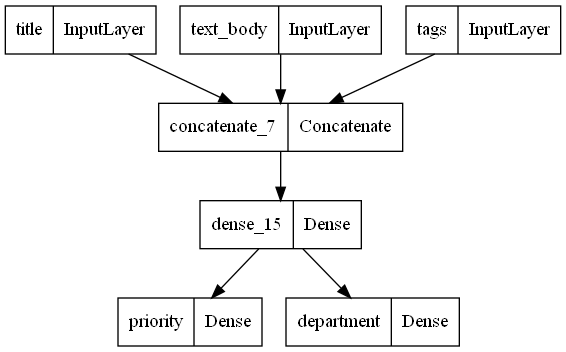

In [109]:
keras.utils.plot_model(model,'tiket_classifier.png')

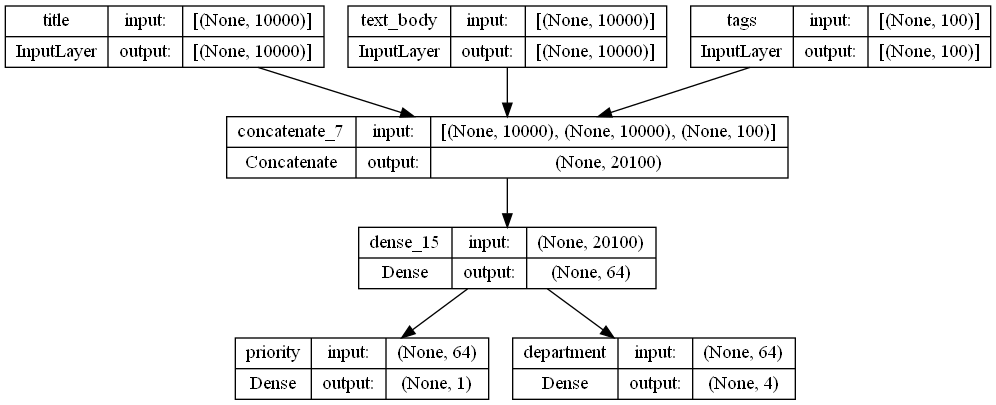

In [110]:
keras.utils.plot_model(model,'tiket_classifier_with_shape_info.png',show_shapes=True)

# 함수형 모델에 있는 층의 입력과 출력을 출력

In [111]:
model.layers

In [112]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [113]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_7')>

# 중간층의 출력을 재사용해서 새로운 모델 

In [114]:
feature = model.layers[4].output
difficulty =  layers.Dense(3,activation='softmax',name='difficulty')(feature)
new_model = keras.Model(inputs =[title,text_body,tags] ,  outputs = [priority,department])
model = keras.Model(inputs=[title,text_body,tags], outputs = [priority,department,difficulty])

ValueError: Found unexpected instance while processing input tensors for keras functional model. Expecting KerasTensor which is from tf.keras.Input() or output from keras layer call(). Got: [[0 0 1 ... 1 0 0]
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 0 0 1]
 ...
 [1 1 1 ... 1 0 1]
 [1 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 1]]

In [115]:
department

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'department')>

# Model 서브클래싱